<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [1]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots"])

    Updating registry at `C:\Users\choan\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Manifest.toml`


In [2]:
import SpecialFunctions
import Plots

In [3]:
using SpecialFunctions
using Plots

In [4]:
function sample_gaussian(μ, σ, n)
    gauss = []
    while length(gauss) < n
        sample = μ + σ * sqrt(2) * erfinv((2*rand())-1)
        push!(gauss, sample)
    end
    return gauss
end

sample_gaussian (generic function with 1 method)

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

In [5]:
import Pkg
Pkg.add("Distributions")

   Resolving package versions...
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\choan\.julia\environments\v1.8\Manifest.toml`


In [6]:
import Distributions

In [7]:
using Distributions

In [8]:
inverse = sample_gaussian(-1, 2, 10000)

10000-element Vector{Any}:
 -1.211767051941604
 -4.353283768419189
  0.15354761705335385
 -1.9097995968694388
  0.3087952869515991
 -3.1104769129829157
 -2.3704632260123324
  0.7846971461160979
 -6.456461056288336
 -3.3293792689949084
 -3.2386478213450545
 -0.3533444767417442
  1.3414034688858778
  ⋮
  1.260166852908196
 -0.5101189267027071
 -0.9361271446697179
  1.2408071170502595
 -1.6234587583382716
 -0.6331775932686456
  0.0697685986494363
 -3.1805960196172434
 -0.7706511841905517
  0.5324116919352067
 -2.139424879691483
 -1.8018110137083934

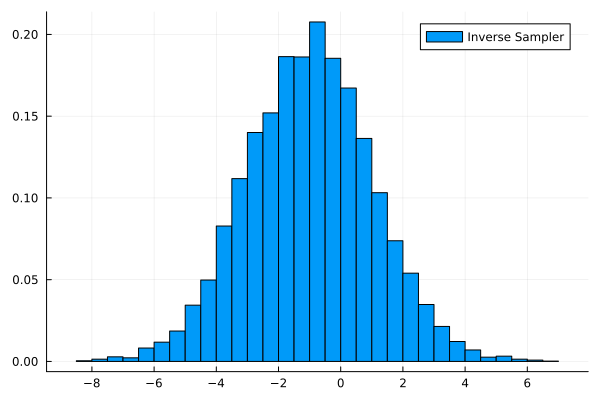

In [9]:
histogram(inverse, bins = 50, normalize = true, label = "Inverse Sampler")

In [10]:
x = -8:0.001:6

-8.0:0.001:6.0

In [11]:
sample = Distributions.Normal(-1,2)

Normal{Float64}(μ=-1.0, σ=2.0)

In [12]:
sample_pdf = Distributions.pdf.(sample, x)

14001-element Vector{Float64}:
 0.0004363413475228801
 0.00043710555878045894
 0.00043787099901516186
 0.00043863766999606706
 0.0004394055734944224
 0.0004401747112836551
 0.00044094508513936836
 0.0004417166968393453
 0.0004424895481635528
 0.0004432636408941397
 0.0004440389768154412
 0.00044481555771398246
 0.0004455933853784757
 ⋮
 0.00044481555771398246
 0.0004440389768154412
 0.0004432636408941397
 0.0004424895481635528
 0.0004417166968393453
 0.00044094508513936836
 0.0004401747112836551
 0.0004394055734944224
 0.00043863766999606706
 0.00043787099901516186
 0.00043710555878045894
 0.0004363413475228801

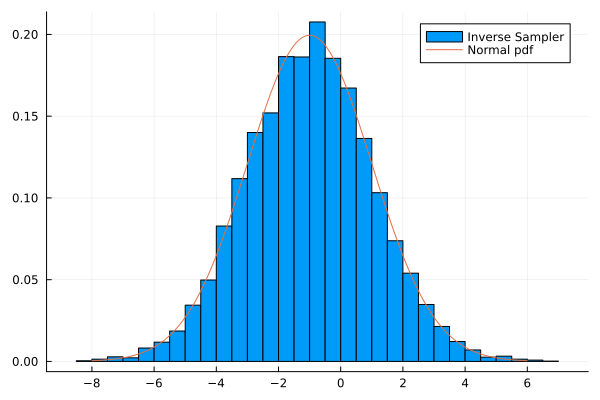

In [13]:
plot!(x, sample_pdf, label = "Normal pdf")